In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt 
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [10,5]
plt.style.use('ggplot')  

This notebook aims to address an application of the parametric Value at Risk technique, discussing its conditions and limitations. The topics will be discussed in the following order:
* Introduction and explanation of the method;
* Risk assessment of a stock using the real price time series of the asset;
* Risk assessment of a stock portfolio using the real price time series of the assets;
* Method validation using a sliding window and comparison with real outcomes

# Value at Risk(VaR)

The Value at Risk (VaR) represents the maximum expected loss of a stock, set of stocks, or index with significance $\alpha$. VaR answers the question 'How much can I lose with $\alpha$ probability over a predefined time horizon?', meaning that after observing an asset for a certain period, how much of the capital would I lose if an event of probability $\alpha$ occurred.

### Introduction to Value as Risk

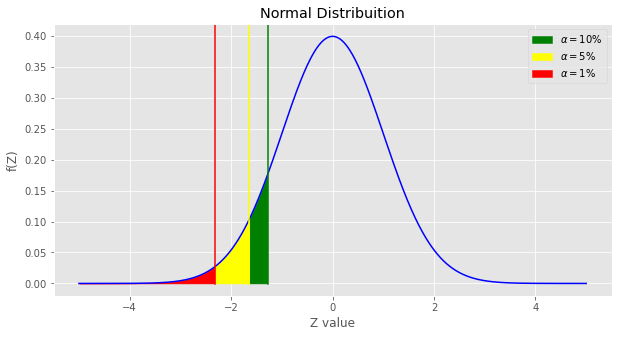

In [5]:
# Parameters and Data
mean = 0
std = 1
x = np.linspace(-5, 5, 1000)
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std**2))

# Creating graph
plt.plot(x, y, color='blue')

# Filling area 
plt.fill_between(x, y, where=((x < -1.28155)&(x >-1.64485)), color='green', alpha=1,label = r'$\alpha = 10$%')
plt.fill_between(x, y, where=((x <-1.64485)&(x >-2.32635 )), color='yellow', alpha=1,label = r'$\alpha = 5$%')
plt.fill_between(x, y, where=((x < -2.32635)), color='red', alpha=1, label = r'$\alpha = 1$%')

plt.axvline(x = -1.28155, color = 'green',ymin=0.0425)
#plt.text(-1.18155,0.4,'Z=-1.18155')
plt.axvline(x = -1.64485, color = 'yellow',ymin=0.0425)
#plt.text(-1.64485,0.35,'Z=-1.64485')
plt.axvline(x = -2.32635, color = 'red',ymin=0.0425)
#plt.text(-2.32635,0.3,'Z=-2.32635')


plt.xlabel('Z value')
plt.ylabel('f(Z)')
plt.title('Normal Distribuition')
plt.legend()

plt.grid(True)
plt.show()

## Stock Risk Assessment

In [12]:
start_date = dt.datetime(2022, 1, 1)# Look for other windows of 2y (like 2017)
ticker = yf.Ticker("ELET3.SA")
serie = ticker.history(period="2y",start=start_date)
serie.drop(serie.loc[serie['Open']==0].index,inplace=True) # Droping 0 values for stock price
data_series[f'{stock}'] = serie['Open'].values

In [7]:
data_series

,ELET3.SA
0,32.582894
1,31.783912
2,30.975190
3,31.150573
4,30.692620
...,...
498,42.020000
499,41.799999
500,41.750000
501,41.200001


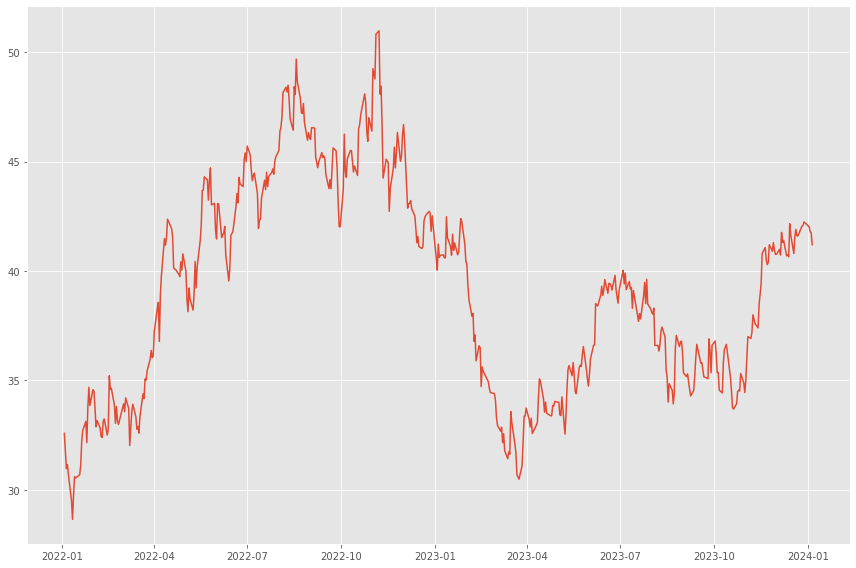

In [8]:
fig = plt.figure(figsize=(12,8))
plt.plot(serie.index[0:-1],data_series['ELET3.SA'].values[0:-1])
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D93FF8BB00>]],
      dtype=object)

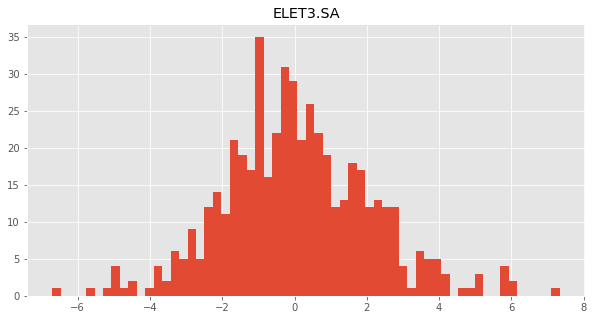

In [10]:

daily_return = data_series.pct_change()*100
daily_return.hist(bins = 60)

Text(0.5, 1.0, 'Daily Return Distribution')

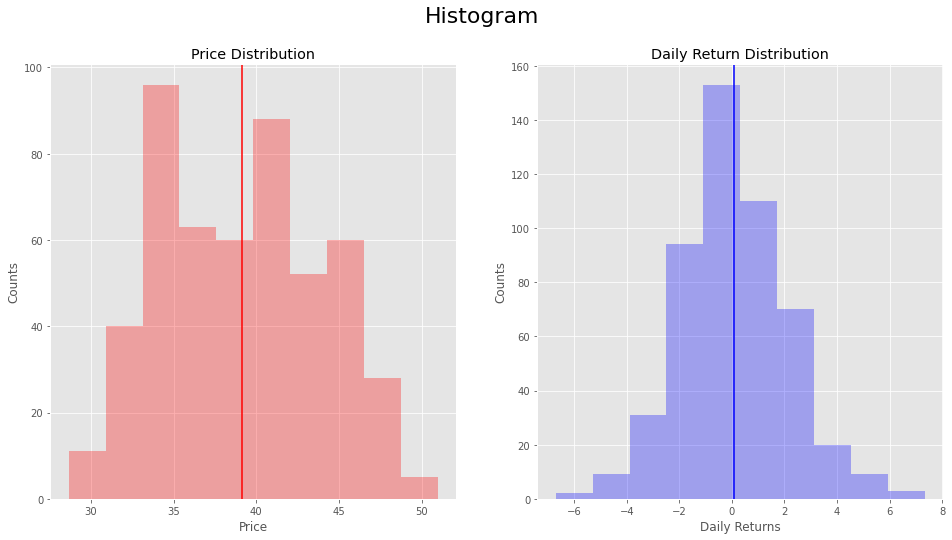

In [11]:
Price = data_series['ELET3.SA'].values
Daily_return = data_series['ELET3.SA'].pct_change().values[1:-1]*100


fig, axs = plt.subplots(1,2,figsize = (16,8))

plt.suptitle('Histogram',fontsize = 22)
axs[0].hist(Price, bins = 'sturges', alpha = 0.3,color = 'red')
axs[0].axvline(Price.mean(),color = 'red')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Counts')
axs[0].set_title('Price Distribution')
#axs[0].text(26,200,f'Média: {round(Price.mean(),2)}')


##
axs[1].hist(Daily_return, bins = 'sturges', alpha = 0.3,color = 'blue')
axs[1].axvline(Daily_return.mean(),color = 'blue')
axs[1].set_xlabel('Daily Returns')
axs[1].set_ylabel('Counts')
axs[1].set_title('Daily Return Distribution')
#axs[1].text(25.83,200,f'Média: {round(Daily_return.mean(),2)}')

## Portifolio Risk Assessment

In [ ]:
start_date = dt.datetime(2022, 1, 1)# Look for other windows of 2y (like 2017)
data_series = pd.DataFrame()
stocks = ['ELET3.SA']
for stock in stocks:
    ticker = yf.Ticker(stock)
    serie = ticker.history(period="2y",start=start_date)
    serie.drop(serie.loc[serie['Open']==0].index,inplace=True) # Droping 0 values for stock price
    data_series[f'{stock}'] = serie['Open'].values

## Validation